# 6.5 Cluster Sample for excel

This script contains the following: using newer dataset, cleaned with house_size and price - outliers removed
1. Importing libraries
2. The elbow technique
3. k-means clustering

## 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/nancykray/Desktop/Real Estate Project'

In [4]:
df = pd.read_pickle(os.path.join(path,'Prepared Data', 'df_clean7.pkl'))

In [5]:
df.shape

(2213729, 13)

In [6]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,Price category
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.000,0,Middle price
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.000,0,Low price
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.000,0,Low price
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.000,0,Middle price
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,2715.133,0,Low price


In [7]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,Price category
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.000,0,Middle price
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.000,0,Low price
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.000,0,Low price
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.000,0,Middle price
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,2715.133,0,Low price


In [8]:
df.tail()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,Price category
2221841,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25,Middle price
2221842,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25,Middle price
2221843,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24,Middle price
2221844,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24,Middle price
2221845,108243.0,sold,580000.0,5.0,3.0,0.31,307704.0,Richland,Washington,99354.0,3615.0,2022-03-23,High price


In [9]:
# create random sample due to the dataset being to big

# Specify the fraction of the dataset you want to sample
sample_fraction = 0.1  # This will take a 10% sample

# Get a random sample of the dataset
df_sample = df.sample(frac=sample_fraction, random_state=42)

# Display the first few rows of the sample
print(df_sample.head())


         brokered_by    status     price       bed      bath  acre_lot  \
816545       79221.0  for_sale  319900.0  3.000000  2.000000      0.34   
1581164      55825.0      sold  745000.0  5.000000  6.000000      1.13   
121223       71943.0  for_sale  329000.0  1.000000  1.000000      0.26   
1184355      46935.0  for_sale  159000.0  3.275919  2.496373      1.00   
1991835      33718.0      sold  664950.0  5.000000  4.000000      0.29   

            street        city      state  zip_code  house_size  \
816545   1769146.0      Isanti  Minnesota   55040.0    2058.000   
1581164   303468.0  Midlothian   Virginia   23113.0    4245.000   
121223   1267694.0    Brooklyn   New York   11224.0     800.000   
1184355   431834.0  Heber City       Utah   84032.0    2715.133   
1991835   365058.0     El Paso      Texas   79912.0    4164.000   

        prev_sold_date Price category  
816545      2020-12-18   Middle price  
1581164     2022-03-04     High price  
121223               0   Middle 

### 2. Data Cleaning
Preprocessing data to remove categorical variables

In [10]:
# drop columns with categorical variables (non-numeric)

df_1= df_sample.select_dtypes(include=[np.number])

In [11]:
# Check columns
df_1.columns

Index(['brokered_by', 'price', 'bed', 'bath', 'acre_lot', 'street', 'zip_code',
       'house_size'],
      dtype='object')

In [12]:
df_1.shape # dropped 5 columns: status, city, state, prev_sold_date, and price category

(221373, 8)

In [13]:
# take out 4 more columns since we also do not need brokered_by, street, prev_sold_date, or zip_code

var_to_include = ['price', 'bed', 'bath', 'acre_lot', 'house_size']

In [14]:
df_2 = df_1[var_to_include]

In [15]:
#check dataframe columns
df_2.columns

Index(['price', 'bed', 'bath', 'acre_lot', 'house_size'], dtype='object')

In [16]:
df_2.shape # now we are working with 5 relevant columns, all numeric

(221373, 5)

### 2. The elbow technique¶

In [17]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [18]:
score = [kmeans[i].fit(df_2).score(df_2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

[-2.2396713951142378e+17,
 -1.1764706056502986e+17,
 -6.62782736258177e+16,
 -4.29248283391675e+16,
 -2.9914740662052776e+16,
 -2.168620245356683e+16,
 -1.6615868311104036e+16,
 -1.2644145415062784e+16,
 -1.0337555699604926e+16]

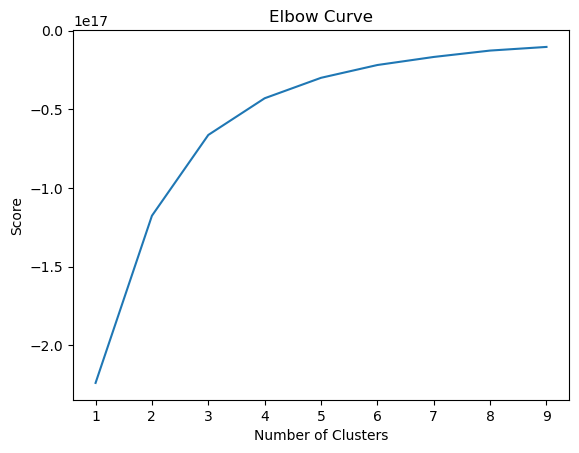

In [25]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.savefig('elbow_curve_1.png')
pl.show()


####  In this example, there's a jump from two to three on the x-axis, but after that, the curve straightens out with a very slight incine This means that the optimal count for your clusters is 3

### 3. k-means clustering

In [26]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [27]:
# Fit the k-means object to the data.

kmeans.fit(df_2)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [28]:
df_2['clusters'] = kmeans.fit_predict(df_2)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_29603/1948498210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['clusters'] = kmeans.fit_predict(df_2)


In [29]:
df_2.head() # check that the new 'clusters' column is there

,price,bed,bath,acre_lot,house_size,clusters
816545,319900.0,3.000000,2.000000,0.34,2058.000,0
1581164,745000.0,5.000000,6.000000,1.13,4245.000,0
121223,329000.0,1.000000,1.000000,0.26,800.000,0
1184355,159000.0,3.275919,2.496373,1.00,2715.133,0
1991835,664950.0,5.000000,4.000000,0.29,4164.000,0


In [30]:
# Save the dataset to an Excel file (IN ORDER TO THEN IMPORT TO TABLEAU)
df_2.to_excel('clustered_data.xlsx', index=False)
